In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
# Customize plots for Jupyter Notebook
from jupyterthemes import jtplot
jtplot.style('onedork')

The purpose of this analysis is to answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.<br>

Exploration 5 high level business questions related to this data:<br>

* What was the best month for sales? How much was earned that month?
* What city sold the most product?
* What time should we display advertisemens to maximize the likelihood of customer’s buying product?
* What products are most often sold together?
* What product sold the most? Why do you think it sold the most?

### Merging 12 month of sales data into a single file

In [3]:
df = pd.read_csv(
    'Sales_Data/Sales_April_2019.csv'
)

In [4]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
df.shape

(18383, 6)

In [6]:
# read all files drom directory and concatenate them to make one single csv file
all_months_data = pd.DataFrame()

files = [
    file for file in os.listdir(
        'Sales_Data'
    )
]

for file in files:
    df = pd.read_csv(
        'Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
all_months_data.shape

(186850, 6)

In [8]:
# create a new file with all 12 months' data
all_months_data.to_csv('all_months_data.csv', index=False)

### Read in updated dataframe

In [9]:
all_data = pd.read_csv(
        'all_months_data.csv')

In [10]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

#### Rename columns

In [11]:
# replace spaces in column names
all_data.columns = all_data.columns.str.replace(' ', '_')

In [12]:
# get lowercased strings
all_data.columns = all_data.columns.str.lower()

#### Drop rows of NaN

In [13]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   order_id          186305 non-null  object
 1   product           186305 non-null  object
 2   quantity_ordered  186305 non-null  object
 3   price_each        186305 non-null  object
 4   order_date        186305 non-null  object
 5   purchase_address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [14]:
# detecting all rows with NaN values
all_data.isna().sum()

order_id            545
product             545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
dtype: int64

In [15]:
all_data = all_data.dropna(how='all')

#### Find 'Order Date' in order_date column and delete all these values

In [16]:
temp_df = all_data[all_data['order_date'].str[0:2] == 'Or']
temp_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [17]:
# We have 355 rows of missing data
temp_df.shape

(355, 6)

In [18]:
# delete all these values
all_data = all_data[all_data['order_date'].str[0:2] != 'Or']

### Augment data with additional columns

#### Convert columns to the correct type

In [19]:
all_data.dtypes

order_id            object
product             object
quantity_ordered    object
price_each          object
order_date          object
purchase_address    object
dtype: object

In [20]:
# Change the file types of columns order_id, quantity_ordered, price_each to numerical type
all_data['order_id'] = all_data['order_id'].astype('int32')
all_data['quantity_ordered'] = all_data['quantity_ordered'].astype('int32')
all_data['price_each'] = all_data['price_each'].astype(float).round(2)

#### Add month column 

In [21]:
# transform objet column to datetime format 
all_data['order_date'] = pd.to_datetime(all_data['order_date'])

In [22]:
# add a month column
all_data['month'] = all_data['order_date'].dt.month

In [23]:
all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Add a city column

In [24]:
# add a city column
all_data['city'] = all_data['purchase_address'].apply(lambda x: x.split(',')[1])
all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


In [25]:
# add a zip-code columns
def get_state(address):
    return address.split(',')[2]

In [26]:
all_data['zip_code'] = all_data['purchase_address'].apply(lambda x: get_state(x))
all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,city,zip_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,TX 75001
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,MA 02215
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA 90001
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA 90001
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA 90001


#### Add a sales column

In [27]:
all_data['sales'] = all_data['quantity_ordered'] * all_data['price_each']
all_data.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,city,zip_code,sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas,TX 75001,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston,MA 02215,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,11.99


### What was the best month for sales? How much was earned that month? 

In [28]:
total_sales_per_month= all_data.groupby('month', as_index=False)\
                        .agg({'sales':'sum'})\
                        .rename(columns={'sales': 'total_sales_per_month'})\
                        .sort_values(by='total_sales_per_month', ascending=False)
total_sales_per_month

,month,total_sales_per_month
11,12,4613443.34
9,10,3736726.88
3,4,3390670.24
10,11,3199603.20
4,5,3152606.75
2,3,2807100.38
6,7,2647775.76
5,6,2577802.26
7,8,2244467.88
1,2,2202022.42


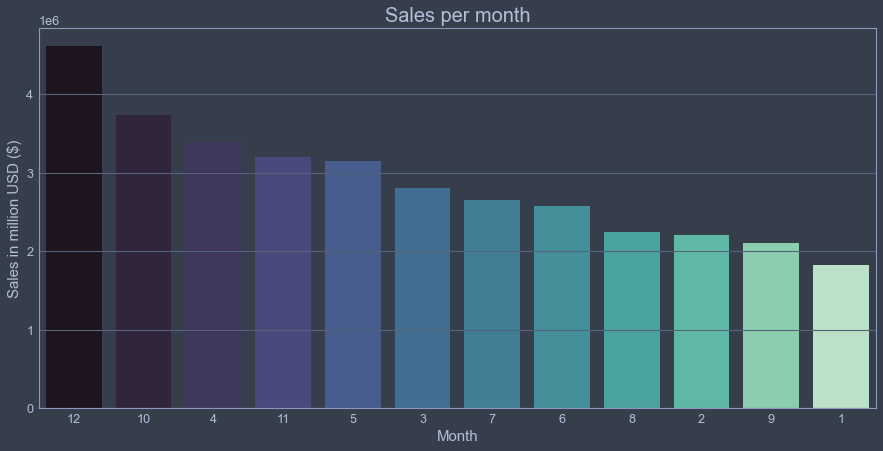

In [29]:
# plot the sales per month
sns.barplot(x='month', 
            y='total_sales_per_month', 
            data=total_sales_per_month, 
            palette='mako',
            order=total_sales_per_month['month'])

plt.title('Sales per month', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sales in million USD ($)', fontsize=15)

plt.gcf().set_size_inches(15, 7);

As we can see on the plot above, the best month for sales was December.<br>
I suppose it's related to the end of the year Holidays. Particularly people buy a lot of gifts for relatives and friends for Christmas.

### What city had the highest number of sales

In [30]:
 total_sales_per_city =  all_data.groupby(['zip_code', 'city'], as_index=False).agg({'sales':'sum'})\
                        .rename(columns={'sales': 'total_sales_per_city'})\
                        .sort_values(by='total_sales_per_city', ascending=False)
total_sales_per_city

,zip_code,city,total_sales_per_city
1,CA 94016,San Francisco,8262203.91
0,CA 90001,Los Angeles,5452570.80
5,NY 10001,New York City,4664317.43
3,MA 02215,Boston,3661642.01
2,GA 30301,Atlanta,2795498.58
8,TX 75001,Dallas,2767975.40
9,WA 98101,Seattle,2747755.48
6,OR 97035,Portland,1870732.34
7,TX 73301,Austin,1819581.75
4,ME 04101,Portland,449758.27


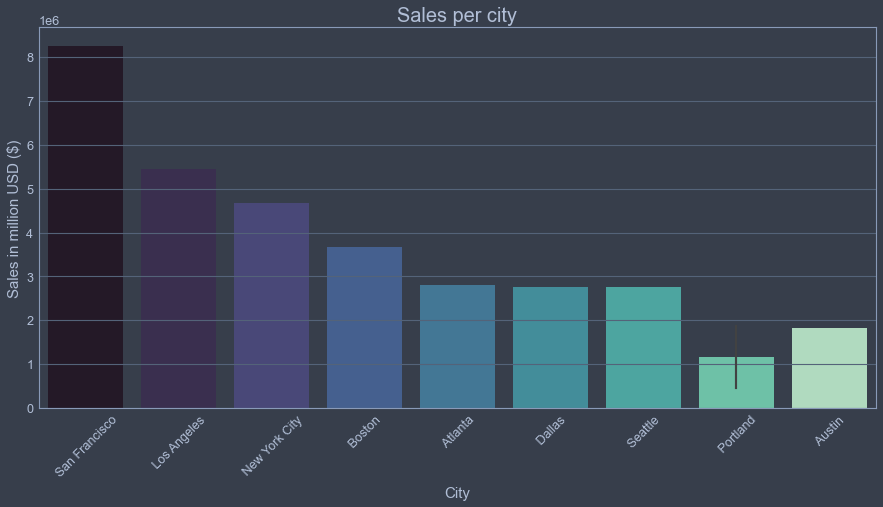

In [31]:
# plot sales per city
sns.barplot(x='city', 
            y='total_sales_per_city', 
            data=total_sales_per_city, 
            palette='mako')

plt.title('Sales per city', fontsize=20)
plt.xlabel('City', fontsize=15)
plt.ylabel('Sales in million USD ($)', fontsize=15)

plt.gcf().set_size_inches(15, 7)
plt.xticks(rotation='45');

The highest sales is observed in San Francisco. This may be directly related to several factors that influence this fact, such as the size of the city, its economic development, and as a consequence, the purchasing power of the population or even different marketing tactics for each of these cities. 

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [32]:
# add an hour column
all_data['hour'] = all_data['order_date'].dt.hour

In [33]:
# add a minute column
all_data['minutes'] = all_data['order_date'].dt.minute

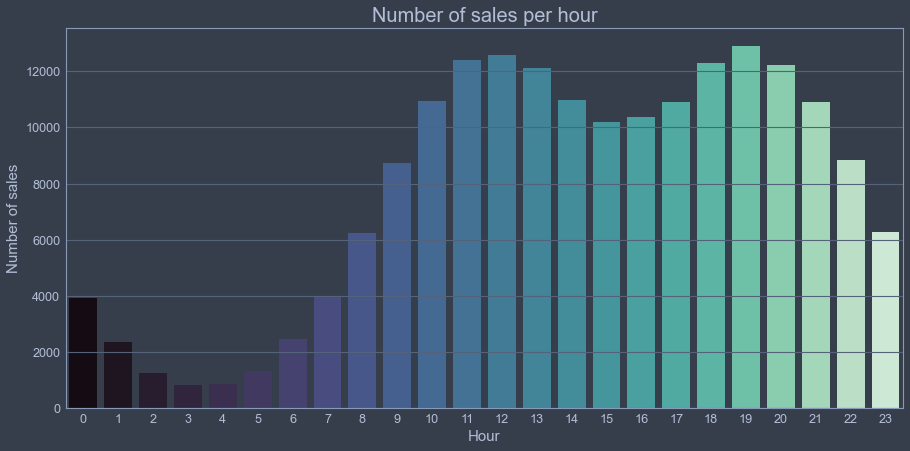

In [34]:
# plot number of sales per hour 
sns.countplot(x=all_data['hour'], palette='mako')

plt.title('Number of sales per hour', fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Number of sales', fontsize=15)

plt.gcf().set_size_inches(15, 7);

On the plot above we have 2 peaks: in the first half of the day (from 11AM till 1PM) and in the evening (from 18 PM till 20 PM).<br>
I assume that the first peak is associated with lunch time, while the second peak occurs in the evening, after work time, when customers are more active.<br>
So we can target the advertisements at this time to  maximize likelihood of customer's buying product.

### What products are most often sold together 

In [35]:
# Calculate the unique products
all_data['product'].nunique()

19

In [36]:
all_data['product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [37]:
# Create a dataframe with orders that contained multiple items
# Search all duplicates
duplicated_df = all_data[all_data['order_id'].duplicated(keep=False)]
duplicated_df.head()

,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,city,zip_code,sales,hour,minutes
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,600.00,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,11.99,14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,600.00,19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,11.95,19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,MA 02215,99.99,11,31


In [38]:
duplicated_df.shape

(14649, 12)

We see that our dataset contains several lines of the same order, but with different products. In order to get rid of this, I'll add a new column with a list of all products for each order, and after that I'll drop all duplicated rows.

In [39]:
# Group different product for each order
duplicated_df['grouped_items'] = duplicated_df.groupby('order_id')['product']\
                                              .transform(lambda x: ','.join(x))
duplicated_df.head()

C:\Users\Levi9\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,order_id,product,quantity_ordered,price_each,order_date,purchase_address,month,city,zip_code,sales,hour,minutes,grouped_items
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,600.00,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,11.99,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,600.00,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles,CA 90001,11.95,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,Boston,MA 02215,99.99,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [40]:
df_some_items = duplicated_df[['order_id', 'grouped_items']].drop_duplicates()
df_some_items.head()

,order_id,grouped_items
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


To understand what products are most often sold together let's count all the pairs of products. 

In [41]:
from itertools import combinations
from collections import Counter

In [42]:
count = Counter()

# loop counting all pairs of products
for row in df_some_items['grouped_items']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

# List of 10 most often sold together products  
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In most cases, customers bought together a mobile phone from different brands and a charging cable or headphones.<br>
This information could help business to make decisions. For example, we can propose special promotional tactics. 

### What product sold the most? Why it sold the most? 

In [43]:
# Filter products by quantity ordered
product_group = all_data.groupby('product', as_index=False)\
                .agg({'quantity_ordered': 'sum'})\
                .sort_values(by='quantity_ordered', ascending=False)

product_group

,product,quantity_ordered
5,AAA Batteries (4-pack),31017
4,AA Batteries (4-pack),27635
15,USB-C Charging Cable,23975
12,Lightning Charging Cable,23217
17,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
2,27in FHD Monitor,7550
18,iPhone,6849
1,27in 4K Gaming Monitor,6244


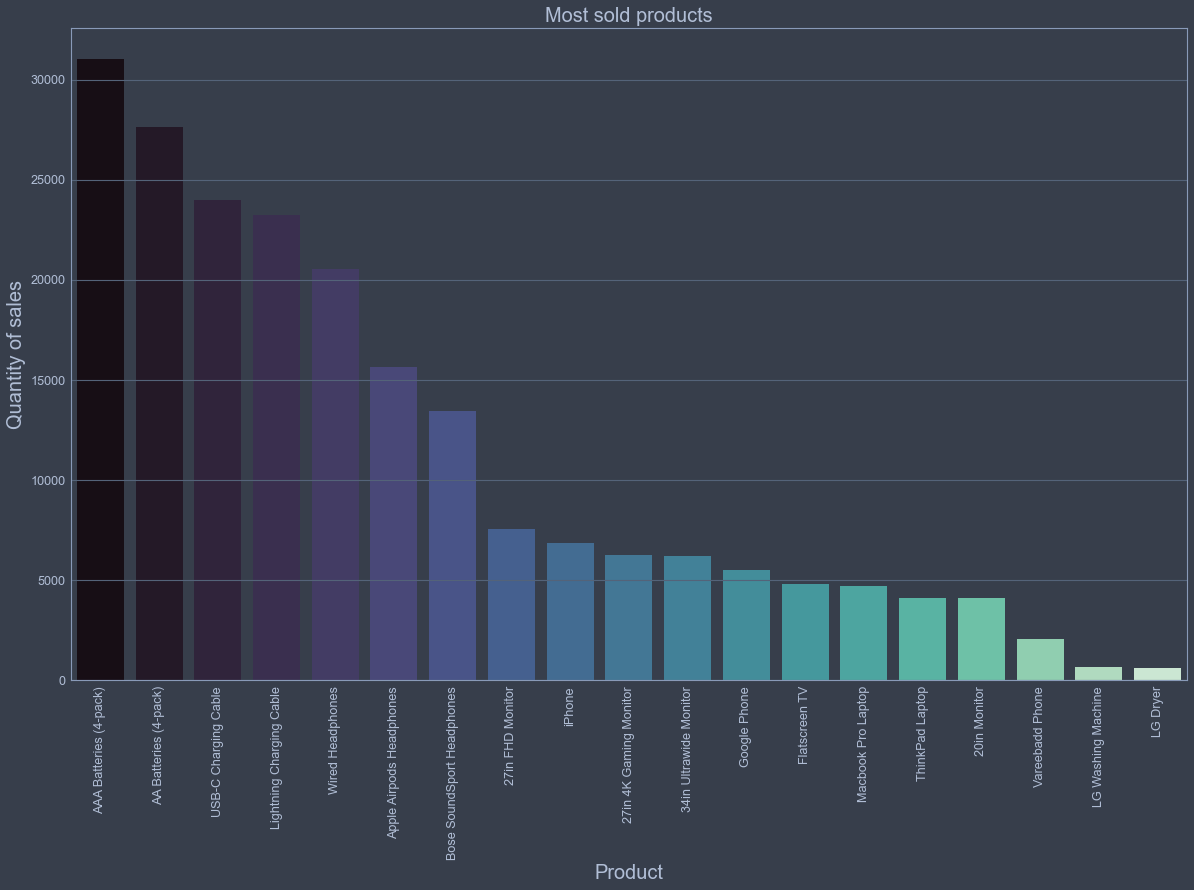

In [44]:
# Plot products by quantity ordered 
sns.barplot(x='product', 
            y='quantity_ordered', 
            data=product_group, 
            palette='mako')

plt.title('Most sold products', fontsize=20)
plt.xlabel('Product', fontsize=20)
plt.ylabel('Quantity of sales', fontsize=20)

plt.gcf().set_size_inches(20, 12)
plt.xticks(rotation='90');

The top five best-selling products include иatteries, сharging сableы and headphones.<br>
I suppose it's related to the price of the items. So, the lower the product, the more customers will purchase it. Conversely, the higher the price of the product, the less buyers there will be.

In [45]:
# Calculate the average price of each product
prices = all_data.groupby('product', as_index=False)\
         .agg({'price_each': 'mean'})\
         .sort_values(by='price_each')
prices

,product,price_each
5,AAA Batteries (4-pack),2.99
4,AA Batteries (4-pack),3.84
15,USB-C Charging Cable,11.95
17,Wired Headphones,11.99
12,Lightning Charging Cable,14.95
7,Bose SoundSport Headphones,99.99
0,20in Monitor,109.99
2,27in FHD Monitor,149.99
6,Apple Airpods Headphones,150.00
8,Flatscreen TV,300.00


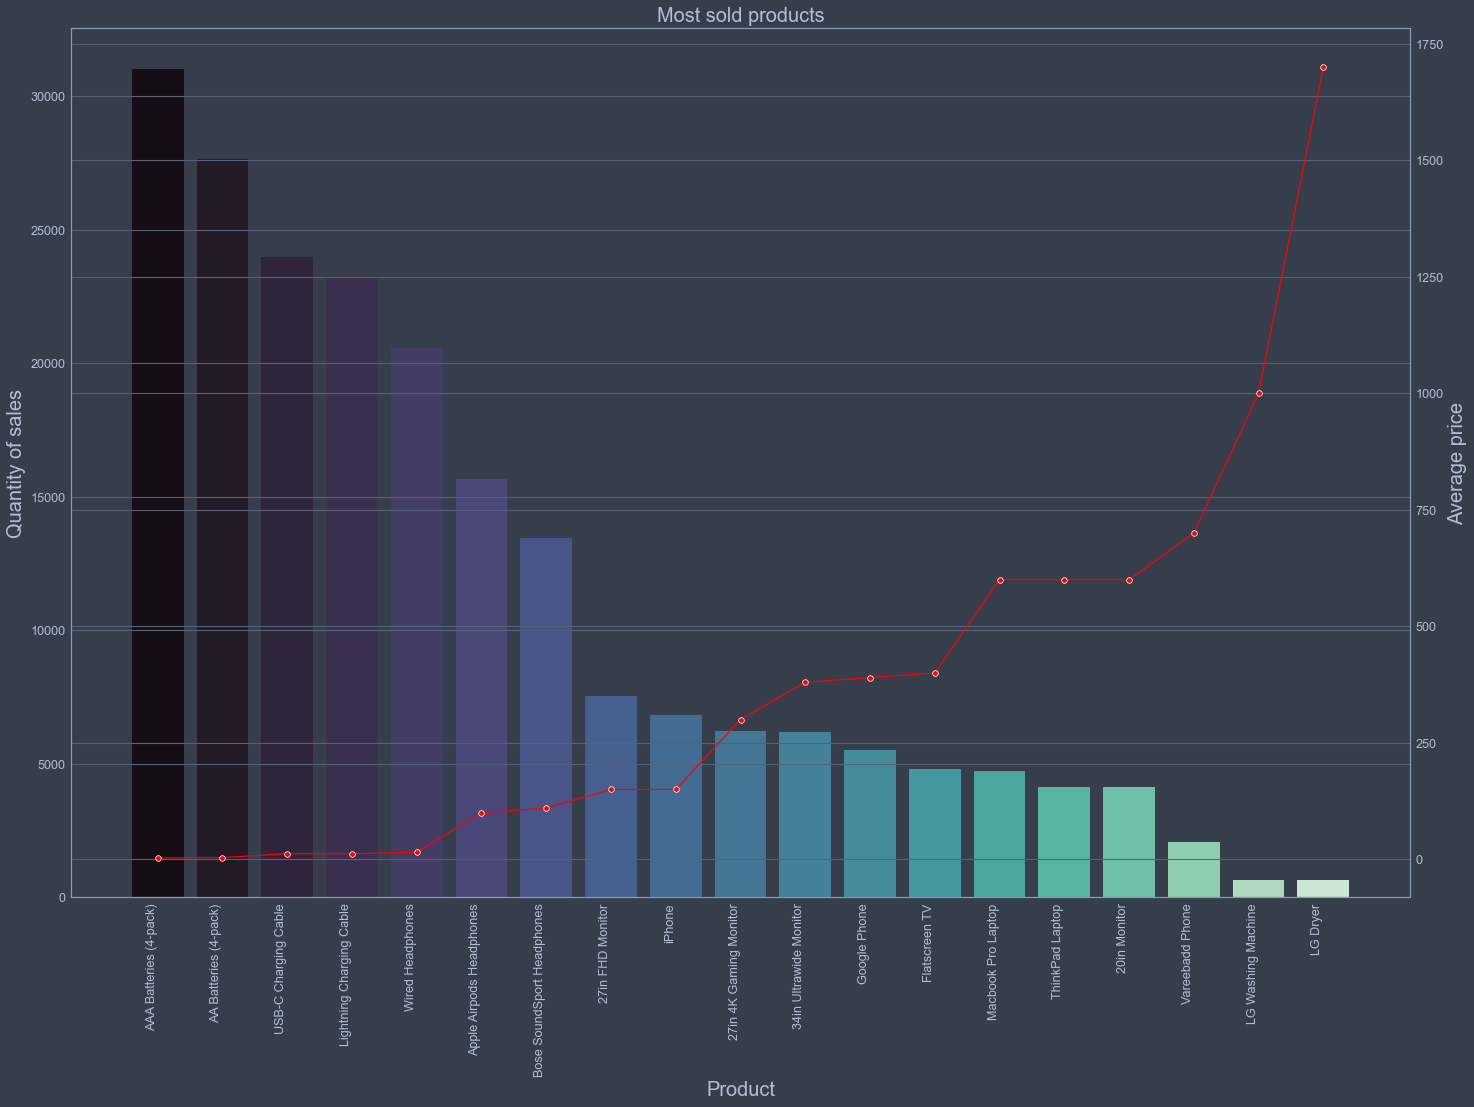

In [46]:
# Plot the average price of each product on the second y-axis
fig, ax = plt.subplots()

sns.barplot(x='product', y='quantity_ordered', data=product_group, palette="mako", ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='product', y='price_each', data=prices, marker='o', color='red', markers=True, ax=ax2)

# replace helper axis with actual data
ax.set_xticklabels(product_group['product'].values, rotation = 90, ha="right")

plt.title('Most sold products', fontsize=20)
ax.set_xlabel('Product', fontsize=20)
ax.set_ylabel('Quantity of sales', fontsize=20)
ax2.set_ylabel('Average price', fontsize=20)
plt.gcf().set_size_inches(24, 16);

As we can see on the plot, the assumption was confirmed. Customers buy more cheap products and less expensive products.